### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2020
### Due: Wednesday, June 10, 2020
---

## Final Project Report

## Project Title: Crime in Boston

## Student(s): Prakhar Saxena, Khanh Tran

#### Date: May 26, 2020
---

#### Abstract
---
*(Briefly summarize the project including the problem, data sets, and final findings.)* 

Analytically exploring the Crime incidents in Boston and its possible correlations with various attributes such as Date, Weather and Income. 

### 1. Introduction
---
*(Introduce the project, describe the objectives, and present the results. This section will provide an overview of the entire project including the description of the data sets and the specific data analytics methods and techniques the team used for analyzing the data to address the problem. Highlight the key findings.)* 

Our project will serve as an analytical research on the relationships between weather and income levels, weather and crime rates, and income levels and crime rates in different districts of Boston City, U.S.. The project will also investigate the changes in these relationships with respect to date. The main goal of this project is to find whether there exists any connections among these attributes. In order to achieve this goal, the project has taken in consideration these datasets: 
* District_Corresponding Zips.csv which contains the zipcodes of districts in Boston. This dataset has 15 rows and 2 columns.
* Income Levels.csv which contains the information of average income per household in each area based on zipcodes and the population in each area. This dataset has 23 rows and 3 columns.
* ProjectWeather.csv which contains the weather information such as min, max, and average temperature sorted by date from 2015 to 2018. This dataset has 1463 rows and 6 columns.
* WeatherCrime.csv which contains information about types and descriptions of crimes, their corresponding weather features as well as income levels in each district of Boston. In other words, this dataset is a combination of the above three in conjunction with crime data. This dataset has 320988 rows and 20 columns.

Our approach will start with data cleaning, followed by plotting the relationships of specific attributes in different datasets, and lastly we will perform graph analytics to figure out the correlations among the attributes. The scope of the project is to analyzing these groups of attributes:
* Different Crime Incidents vs Income Levels throughout Districts
* Crime Rate
* Monthly Incident Count
* Monthly Temperature Change vs Incident Count
* Top 20 Offenses by Types
* Shooting vs Offense Code
* Number of Incidents vs Day of the Week and Hour of the Day

Graphs used in this project are line graphs, bar graphs, and column charts. 

### 2. Problem Definition
---
*(Define the problem that will be solved in this data analytics project. Where does the problem come from? Who would be benefited from the solutions presented in this project? Use formal languages and notations to define the problem as much as possible.)*

The first problem that we can solve in this data analytics project is to identify the Boston areas that in the past had witnessed the most crime incidents, and what types. With such discovery, the authorities of Boston City can know where to focus on stopping the crime the most. One of the solutions is to improve the economy or the financial status of the areas, and this project also provides helpful assistance with that via analytical results. Identifying the relationships between income levels and incident counts per district, which is among the main goals of the project, can provide evidence for such case. In other words, this project attempts to find out if weath and poverty is in any ways among the causes of crime in Boston districts. This makes the second problem that our project will try to solve.
Additionally, if we do find even a weak correlation between weather and crime, that could be of big help to the authorities. They can prioritise patrolling around based on the weather.

The third problem is to keep track of the crime incidents count throught twelve months of the year via plotting and analyzing monthly incidents. We try to know if there is a pattern here. And this leads to the next problem that we want to shed the lights on which is how weather (of particular periods of months) may influence the ups and downs of the incidents count. If the pattern is figured out, people in Boston can take precautions and raise their awareness of encountering a crime case based on the weather of the day or the time of the year or the destination they are going to travel to. 



### 3. Data Sources
---
*(Describe the origin of the data sources. What is the format of the original data? How to access the data?)*

* We acquired this data from a variety of sources. The data pertaining to Crimes in Boston is available to all on Kaggle: https://www.kaggle.com/ankkur13/boston-crime-dataNational 
* To link the city zipcodes with the police districts, we acquired data from the Boston Police Department itself:  https://bpdnews.com/districts
* We acquired the household income data by zipcode/district from a website called zipatlas: http://www.zipatlas.com/us/ma/boston/zip-code-comparison/median-household-income.htm
* For weather we acquired our data from the National Oceanic and Atmospheric Administration's National Centers for Environmental Information. They have an API set up for this: https://www.ncdc.noaa.gov/data-access

###### It must be noted that all the data here was availabel in a .csv format.

### 4. Acquiring and Loading Data
---
*(Present the code and methods for acquiring the data. Load the data into appropriate format for analysis. Explain the process and results.)*

### 6. Wrangling and Cleansing Data
---
*(Explore the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explain the process and the results.)*

###### We did 6 before 5, because cleaning data seemed important for data visualisations.
###### Also we put loading and cleaning together, since they're so close and related.

Data cleaning is a preprocessing step needed before we get our hands dirty with plotting and analyzing data. The datasets that we have introduced in the Project Proposal will be loaded into the notebook and cleaned.

Let's import the packages first. We will need pandas, numpy, matplotlib (for visualizing), datetime, and calendar.

In [3]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
import calendar

Start with the districts dataset

In [4]:
# Load dataset
districts = pd.read_csv('DistrictCorrespondingZips.csv')
# Rename columns
districts = districts.rename(columns={'ZipCode': 'ZipCode'})
# Drop duplicate rows
districts.drop_duplicates(inplace=True)

Income dataset

In [5]:
# Load dataset
incomes = pd.read_csv('IncomeLevels.csv')
# Rename columns
incomes = incomes.rename(columns={'Zip Code': 'ZipCode'})

Merge them two together

In [6]:
# Merge datasets
income_dst = incomes.merge(districts, on='ZipCode', how='inner')
income_dst.columns = ['ZIPCODE', 'POPULATION', 'AVG. INCOME', 'DISTRICT']

income_dst

,ZIPCODE,POPULATION,AVG. INCOME,DISTRICT
0,2116,"19,682","$60,467.00",D4
1,2114,"10,868","$55,678.00",A1
2,2114,"10,868","$55,678.00",A15
3,2122,"24,548","$40,021.00",C11
4,2127,"29,456","$39,625.00",C6
5,2124,"50,781","$36,025.00",B3
6,2128,"38,413","$31,013.00",A7
7,2119,"23,823","$26,120.00",B2


Weather dataset

In [7]:
# Load dataset
weather = pd.read_csv('weather.csv')

weather_cln = weather.loc[:,['DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN']]

# Convert to datetime
weather_cln['DATE'] = pd.to_datetime(weather_cln['DATE'], format='%Y-%m-%d').dt.date
weather_cln.head()


,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,2015-01-01,0.00,0.0,26,33,22
1,2015-01-02,0.00,0.0,34,41,31
2,2015-01-03,0.62,1.4,28,37,22
3,2015-01-04,0.57,0.0,38,52,35
4,2015-01-05,0.00,0.0,40,50,17


Crime dataset

In [8]:
# Load dataset
crime = pd.read_csv('crime.csv',encoding='latin1', low_memory=False)
# Change NaN values to N
crime['SHOOTING'] = crime['SHOOTING'].replace(np.nan, 'N')

crime_cln = crime.loc[:,['INCIDENT_NUMBER', 'OFFENSE_CODE_GROUP', 'DISTRICT', 'SHOOTING', 'OCCURRED_ON_DATE', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', ]]
crime_cln

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,HOUR,UCR_PART
0,I182080058,Disorderly Conduct,E18,N,2018-10-03 20:13:00,Wednesday,20,Part Two
1,I182080053,Property Lost,D14,N,2018-08-30 20:00:00,Thursday,20,Part Three
2,I182080052,Other,B2,N,2018-10-03 19:20:00,Wednesday,19,Part Two
3,I182080051,Aggravated Assault,A1,N,2018-10-03 20:00:00,Wednesday,20,Part One
4,I182080050,Aircraft,A7,N,2018-10-03 20:49:00,Wednesday,20,Part Three
...,...,...,...,...,...,...,...,...
327815,I050310906-00,Warrant Arrests,D4,N,2016-06-05 17:25:00,Sunday,17,Part Three
327816,I030217815-08,Homicide,E18,N,2015-07-09 13:38:00,Thursday,13,Part One
327817,I030217815-08,Warrant Arrests,E18,N,2015-07-09 13:38:00,Thursday,13,Part Three
327818,I010370257-00,Warrant Arrests,E13,N,2016-05-31 19:35:00,Tuesday,19,Part Three


In [9]:
# crime_cln['OCCURRED_ON_DATE'].apply(lambda x: datetime.datetime.date(datetime.datetime.strptime(x, "%Y-%m-%d")))
crime_cln.loc[:,'OCCURRED_ON_DATE'] = pd.to_datetime(crime_cln['OCCURRED_ON_DATE'], format='%Y-%m-%d').dt.date
crime_cln = crime_cln.rename(columns={'OCCURRED_ON_DATE': 'DATE'})
crime_cln.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART
0,I182080058,Disorderly Conduct,E18,N,2018-10-03,Wednesday,20,Part Two
1,I182080053,Property Lost,D14,N,2018-08-30,Thursday,20,Part Three
2,I182080052,Other,B2,N,2018-10-03,Wednesday,19,Part Two
3,I182080051,Aggravated Assault,A1,N,2018-10-03,Wednesday,20,Part One
4,I182080050,Aircraft,A7,N,2018-10-03,Wednesday,20,Part Three


Merge them two together

In [10]:
# Merge datasets
weatherCrime = pd.merge(crime_cln, weather_cln, on='DATE', how='inner')
print(weatherCrime.shape)

(327820, 13)


In [11]:
# Drop NaN values
print(weatherCrime.isnull().values.any())
# null_columns=df.columns[df.isnull().any()]
# print(null_columns)
weatherCrime = weatherCrime.dropna()
print(weatherCrime.isnull().values.any())
print(weatherCrime.shape)

True
False
(325953, 13)


Merge the two merged dataframes above into one bigger dataframe

In [12]:
# Merge datasets into a big dataframe
df = pd.merge(weatherCrime, income_dst, on='DISTRICT', how='inner')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART,PRCP,SNOW,TAVG,TMAX,TMIN,ZIPCODE,POPULATION,AVG. INCOME
0,I182080052,Other,B2,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2119,"23,823","$26,120.00"
1,I182080047,Verbal Disputes,B2,N,2018-10-03,Wednesday,19,Part Three,0.21,0.0,59,64,54,2119,"23,823","$26,120.00"
2,I182080035,Other,B2,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2119,"23,823","$26,120.00"
3,I182080028,Investigate Property,B2,N,2018-10-03,Wednesday,18,Part Three,0.21,0.0,59,64,54,2119,"23,823","$26,120.00"
4,I182080027,Verbal Disputes,B2,N,2018-10-03,Wednesday,18,Part Three,0.21,0.0,59,64,54,2119,"23,823","$26,120.00"


<br>

<br>



### 5. Exploring and Visualizing Data
---
*(Cleanse the data, fill up missing data, and wrangle the data to prepare for analysis. Explain the process and the results.)*

### 7. Analyzing Data
---
*(Analyze the data by applying various data analytics methods. The analysis should be guided by the problem defined earlier. Explain the process and results.)*

### 8. Reporting Results
---
*(Use appropriate methods to present the results including tables, plots, and bullet points. Explain how the analysis process and results solve the problem.)*

###### We did 5, 7 and 8 in one go.

### Incidents and Average Income per District

In the first step in exploration, we will try to find is the relationships between the average income  and the incident counts per district. In other words, we will see if there is any kinds of connections between those two attributes (districts will only play as a location attribute) such as low average income will lead to high crime incidents. Data visualization is certainly needed, and our first figure will be a column chart of average income per Boston district.

In [13]:
# Drop the comma in the income values and turn them into float
income_list = [i.replace(",","") for i in income_dst["AVG. INCOME"].values]
avg_income_num = [float(i[1:10]) for i in income_list]
income_dst["AVG. INCOME NUMERIC"] = avg_income_num
# Sort values by district name
income_dst = income_dst.sort_values(by=['DISTRICT'])

income_dst

,ZIPCODE,POPULATION,AVG. INCOME,DISTRICT,AVG. INCOME NUMERIC
1,2114,"10,868","$55,678.00",A1,55678.0
2,2114,"10,868","$55,678.00",A15,55678.0
6,2128,"38,413","$31,013.00",A7,31013.0
7,2119,"23,823","$26,120.00",B2,26120.0
5,2124,"50,781","$36,025.00",B3,36025.0
3,2122,"24,548","$40,021.00",C11,40021.0
4,2127,"29,456","$39,625.00",C6,39625.0
0,2116,"19,682","$60,467.00",D4,60467.0


<Figure size 432x288 with 0 Axes>

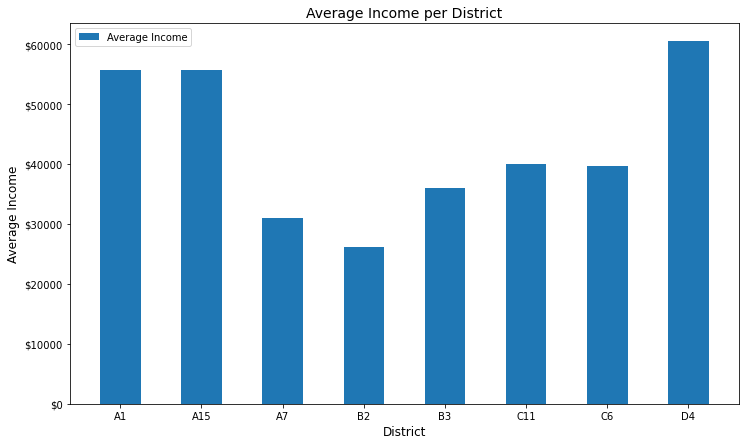

In [14]:
# Plotting
fig = plt.figure()
ax = income_dst.plot.bar(x="DISTRICT", y="AVG. INCOME NUMERIC", figsize=(12,7), label="Average Income")
ax.set_xticklabels(income_dst["DISTRICT"], rotation=360)

# Set ytick labels with the dollar sign
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

# Setting labels
ax.set_title("Average Income per District", size=14)
ax.set_xlabel("District", size=12)
ax.set_ylabel("Average Income", size=12)
ax.legend()
ax.autoscale(tight=False)
plt.show()

<br>

The second figure will also be a column chart but of incident count per Boston district. Before jumping into plotting the data out with matplotlib, a new dataframe will be created using .groupby() method to catch the total number of incidents in each district.

In [15]:
# Create a new dataframe with incident counts per district
incident_count = crime_cln.groupby(['DISTRICT']).size().reset_index(name="Incident Count")

incident_count

,DISTRICT,Incident Count
0,A1,36735
1,A15,6663
2,A7,13634
3,B2,51288
4,B3,36400
5,C11,43817
6,C6,24190
7,D14,20632
8,D4,43338
9,E13,17981


<Figure size 432x288 with 0 Axes>

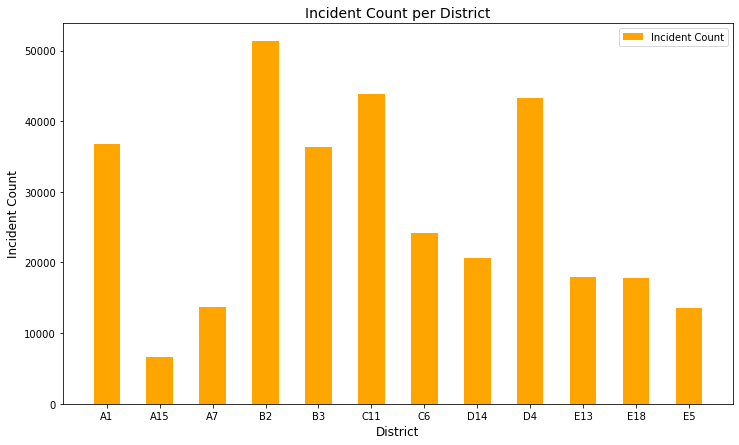

In [16]:
# Plotting
fig = plt.figure()
ax = incident_count.plot.bar(x="DISTRICT", y="Incident Count", color="orange",figsize=(12,7))
ax.set_title("Incident Count per District", size=14)
ax.set_xticklabels(incident_count["DISTRICT"], rotation=360)
ax.set_xlabel("District", size=12)
ax.set_ylabel("Incident Count", size=12)
ax.autoscale(tight=False)
plt.show()

<br>

After having two seperate charts, what we notice is that the second chart has more districts, or more attributes than the first chart. This difference is resulted from the lack of measurements for more zipcodes in the original income dataset. Therefore, the third figure will be a combination of the first two, and the set of districts will be similar to that of the first figure. A double column chart will be plotted in order to efficiently visualize the difference between two graphs. The color of the graphs will be kept the same. We will also have a double y-axis.

In [17]:
# Create a new dataframe that contains only incident counts of the districts in income_dst
incident_count_cut = incident_count["Incident Count"].values[:7]
incident_count_cut = np.append(incident_count_cut, incident_count["Incident Count"].values[8])
incident_count_cut = pd.DataFrame(incident_count_cut, columns=['Incident Count'])
incident_count_cut = pd.concat([income_dst["DISTRICT"].reset_index(), incident_count_cut], axis=1)

incident_count_cut

,index,DISTRICT,Incident Count
0,1,A1,36735
1,2,A15,6663
2,6,A7,13634
3,7,B2,51288
4,5,B3,36400
5,3,C11,43817
6,4,C6,24190
7,0,D4,43338


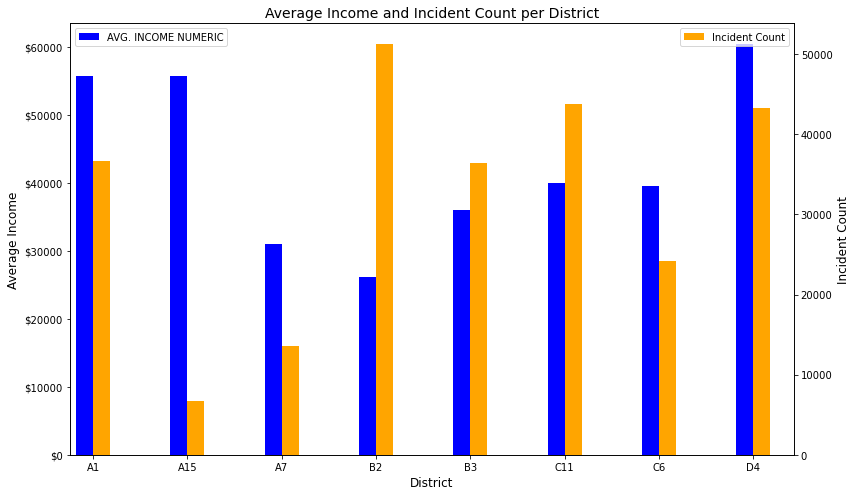

In [18]:
fig, ax1 = plt.subplots(1,1, figsize=(12,7)) # Create matplotlib figure

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

width = 0.18 # Set the bar width

# Plotting for each axes
income_dst.plot.bar(x="DISTRICT", y="AVG. INCOME NUMERIC", color="blue", ax=ax1,
                    width=width, position=1)
ax1.set_xticks([i for i in range(0,8)])
ax1.set_xticklabels(income_dst["DISTRICT"], rotation=360)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax1.yaxis.set_major_formatter(formatter)
ax1.set_xlabel("District", size=12)
ax1.set_ylabel("Average Income", size=12)
ax1.set_title("Average Income and Incident Count per District", size=14)

incident_count_cut.plot.bar(x="DISTRICT", y="Incident Count", color="orange", ax=ax2,
                       width=width, position=0)
ax2.set_ylabel("Incident Count", size=12)

fig.tight_layout()

plt.show()

This graph gives us insight into whether high rates of crime is co-related to income in any dimension(s). According to this graph, there appears to be some correlation between the two, but not a very strong one. District B2, which has the lowest average income in the city, also has the highest number of criminal incidents out of all the districts. Then, if one looks at district A15 and the number of incidents there, one could think that high crime rate is strongly correlated to low incomes. But districts D4 and A1 put an exception to that rule. The average incomes in those two districts are two of the highest in the City, yet the incidents there are higher than most of the districts. Our group is aware that there may be more variables that could predict crime in certain districts based off income but based off our datasets there is no strong correlation.

<br>

### Crime Rate

The second exploration will be crime rate in Boston. In this exploration, we will continue to use data visualization with matplotlib and graph analysis just like what we did in the first exploration. This time, we only need one column chart. For the sake of plotting, we will create a new dataframe called "crime_pop" from our "incident_count_cut" dataframe and the population values from "income_dst" dataframe. "crime_pop" will contain the incident counts and the population of each district. We then add a "Crime Rate" column to this dataframe with the formula:

                     Crime Rate = Incident Counts \ Population


In [19]:
# Population list
pop_list = [i.replace(",","") for i in income_dst["POPULATION"].values]

crime_pop = incident_count_cut
crime_pop["Population"] = pop_list
crime_pop["Crime Rate"] = crime_pop["Incident Count"]/crime_pop["Population"].astype('int')

crime_pop

,index,DISTRICT,Incident Count,Population,Crime Rate
0,1,A1,36735,10868,3.380107
1,2,A15,6663,10868,0.613084
2,6,A7,13634,38413,0.354932
3,7,B2,51288,23823,2.152877
4,5,B3,36400,50781,0.716804
5,3,C11,43817,24548,1.784952
6,4,C6,24190,29456,0.821225
7,0,D4,43338,19682,2.201910


<Figure size 432x288 with 0 Axes>

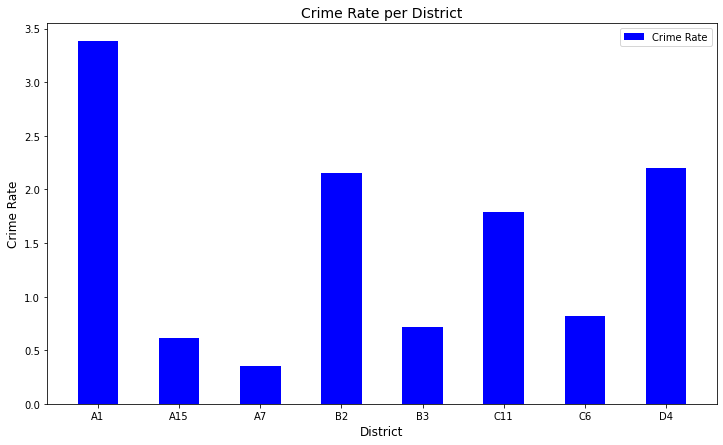

In [20]:
# Plotting
fig = plt.figure()
ax = crime_pop.plot.bar(x="DISTRICT", y="Crime Rate", color='blue', figsize=(12,7))
ax.set_title("Crime Rate per District", size=14)
ax.set_xticklabels(crime_pop["DISTRICT"], rotation=360)
ax.set_xlabel("District", size=12)
ax.set_ylabel("Crime Rate", size=12)
ax.autoscale(tight=False)
plt.show()

The reason why we chose this graph is because it tells us about the crime rate in each district, which we tried to associate with the high population or the median income in that district. This way, we could also figure out how much of a factor income is in the crime. But, as seen in the previous graph, the rule that high income is associated to low crimes was put to rest.
Drawing conclusion from the graph, clearly district A1 has the crime rate out of all the districts with nearly 3.5 crime incidents/person. That is an astonishing rate compared to the lowest rate of just below 0.5 incidents/person in A7 district. Beside A7, B3 and A15 also have one of the lowest crime rates in Boston.


<br>

### Incidents vs Month

Next exploration will be to understand if there is any occurrence between the incident counts and the time of the year. The finding from this data could be related to the season and/or temperature.

Before plotting, we need to extract the month and year from "crime_cln" dataframe, then use .groupby() method to get the incident counts per month, year and put them into a new dataframe. This time, we use a line graph for plotting.

In [21]:
# Extract year and month from the 'DATE' column of crime_cln dataframe
crime_cln['year'] = pd.DatetimeIndex(crime_cln["DATE"]).year
crime_cln['month'] = pd.DatetimeIndex(crime_cln["DATE"]).month
# Convert to month name
crime_cln['month name'] = crime_cln['month'].apply(lambda x: calendar.month_abbr[x])
# Create a new "Month Year" column
crime_cln['Month Year'] = crime_cln['month name'] + ' ' + crime_cln['year'].astype('str')
# Create a new dataframe containing incident counts per month, year.
crime_month = crime_cln.groupby(['Month Year', 'month', 'year']).size().reset_index(name="Incident Count")
# Sort values by year then month
crime_month = crime_month.sort_values(['year', 'month'])

crime_month = crime_month.reset_index(drop=True)


In [22]:
# Check the head 10
crime_month.head(10)

,Month Year,month,year,Incident Count
0,Jun 2015,6,2015,4191
1,Jul 2015,7,2015,8326
2,Aug 2015,8,2015,8343
3,Sep 2015,9,2015,8415
4,Oct 2015,10,2015,8308
5,Nov 2015,11,2015,7818
6,Dec 2015,12,2015,7991
7,Jan 2016,1,2016,7837
8,Feb 2016,2,2016,7310
9,Mar 2016,3,2016,8199


In [23]:
# Check the tail 10
crime_month.tail(10)

,Month Year,month,year,Incident Count
31,Jan 2018,1,2018,7795
32,Feb 2018,2,2018,6943
33,Mar 2018,3,2018,7778
34,Apr 2018,4,2018,7935
35,May 2018,5,2018,8939
36,Jun 2018,6,2018,8883
37,Jul 2018,7,2018,8617
38,Aug 2018,8,2018,8645
39,Sep 2018,9,2018,8132
40,Oct 2018,10,2018,689


<Figure size 432x288 with 0 Axes>

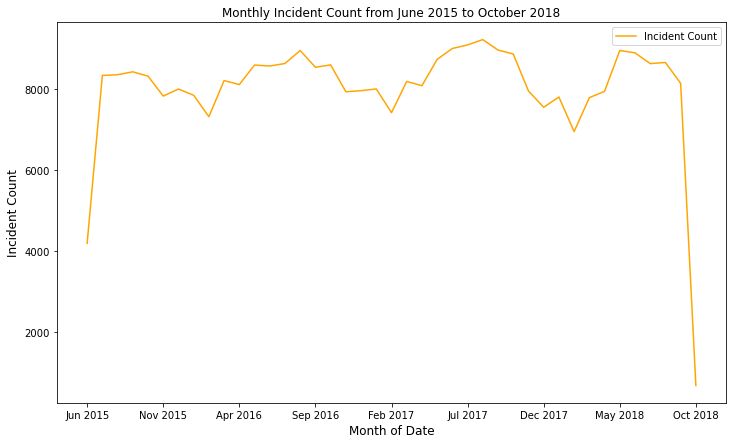

In [24]:
# Plotting
fig = plt.figure()
ax = crime_month.plot(x='Month Year', y="Incident Count", color='orange', figsize=(12,7))
ax.set_title("Monthly Incident Count from June 2015 to October 2018")
ax.set_xlabel("Month of Date", size=12)
ax.set_ylabel("Incident Count", size=12)
ax.autoscale(tight=False)
plt.show()

Clearly, the incidents count in Boston was quite consistent through out the months of our three-year span from 2015 to 2018. The number fluctuated around +/-500 of averagely 8000 cases. The two steep drops at the beginning and the end of the graph do not indicate any significant change in June 2015 and October 2018 but rather because the original dataset starts its measurements on June 15, 2015 and ends it on October 3, 2018. In other words, the incident count in June 2015 was approximately reduced by half in this dataset, and that in October 2018 was only the count of the first three days of the month. Statistically, we can actually back this up. There were 4191 cases in June 2015 according to the dataset, and the average was around 8000+/-500, clearly half of the real data was not counted here. Similarly, if we multiply 3 by 10 (since October has 31 days), we will also get nearly 7000 cases in October 2018, and this number is roughly in the range of our average cases.

To sum up, despite a shortage of data in the first and last month of our measurements, the crime incidents in Boston was quite consistent through out the months. If we have to draw a conclusion about the ups and downs of the figure, it is noticable that there were moderate rises during the summers and drops during the winters. Perhaps, the incidents count, at some level, relate to the change of temperature.

<br>

### Top 10 Crime Categories

There are many types of crime, and in our datasets, we have categorized every crime incident. Our goal is very simple in this exploration, try to plot out the top 10 crime categories, just to provide a somehwhat useful statistics serving as reference for our other explorations below.

In [25]:
# Extract the total number of incident count for each category and then sort them in descending order
top_crimes = crime_cln.groupby(['OFFENSE_CODE_GROUP']).size().reset_index(name="Incident Count").sort_values(by='Incident Count', ascending=False)
top_crimes.reset_index(drop=True, inplace=True)
top_crimes.head(10)

,OFFENSE_CODE_GROUP,Incident Count
0,Motor Vehicle Accident Response,38134
1,Larceny,26670
2,Medical Assistance,24226
3,Investigate Person,19176
4,Other,18612
5,Drug Violation,17037
6,Simple Assault,16263
7,Vandalism,15810
8,Verbal Disputes,13478
9,Towed,11632


<Figure size 432x288 with 0 Axes>

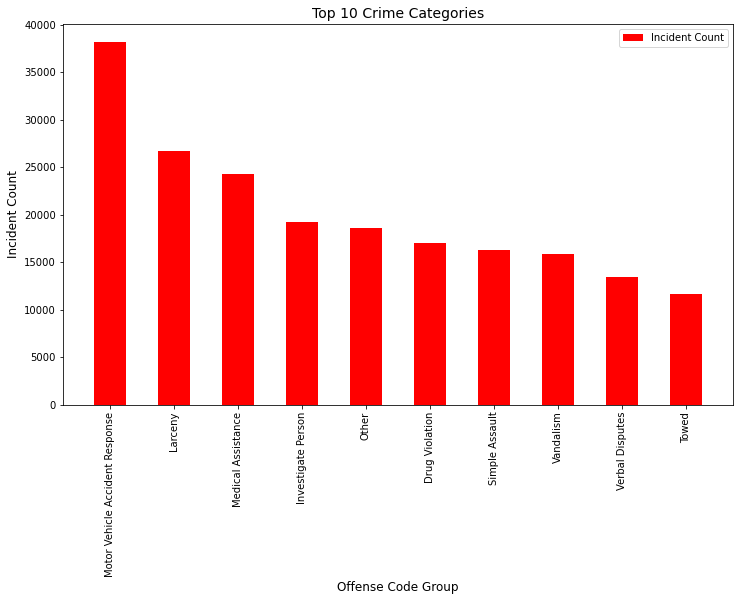

In [26]:
# Plotting
fig = plt.figure()
ax = top_crimes.head(10).plot.bar(x='OFFENSE_CODE_GROUP', y='Incident Count', color='red',
                                  rot=90, figsize=(12,7))
ax.set_title("Top 10 Crime Categories", size=14)
ax.set_xlabel("Offense Code Group", size=12)
ax.set_ylabel("Incident Count", size=12)
ax.autoscale(tight=False)
plt.show()


<br>

### Temperature and Crime Vs Months (split by UCR part catogerisation)

Following the possibility stated by the last exploration, we are going to conduct our next discovery of whether there is a connection between temperature and crime. In addition to our monthly incident counts, we will make use of the temperature data. In this exploration, we will create more than one line graphs as we are intended to visualize the data according to UCR part catogerisation. The four parts of UCR that our visualization will be based on are: UCR Part One, UCR Part Two, UCR Part Three, and UCR Other.

The first thing is to divide 'weatherCrime' dataframe into four samller dataframes corresponding to the four different UCR parts. We will use simple dataframe slicing technique.

In [27]:
# Add 'year' and 'month' columns to 'weatherCrime' dataframe
weatherCrime['year'] = pd.DatetimeIndex(weatherCrime["DATE"]).year
weatherCrime['month'] = pd.DatetimeIndex(weatherCrime["DATE"]).month

In [28]:
# New dataframe only contains UCR Part One
UCR_p1 = weatherCrime[weatherCrime["UCR_PART"] == "Part One"]
UCR_p1.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART,PRCP,SNOW,TAVG,TMAX,TMIN,year,month
2,I182080051,Aggravated Assault,A1,N,2018-10-03,Wednesday,20,Part One,0.21,0.0,59,64,54,2018,10
17,I182080029,Larceny,D4,N,2018-10-03,Wednesday,19,Part One,0.21,0.0,59,64,54,2018,10
20,I182080027,Larceny,B2,N,2018-10-03,Wednesday,18,Part One,0.21,0.0,59,64,54,2018,10
37,I182080005,Auto Theft,B2,N,2018-10-03,Wednesday,7,Part One,0.21,0.0,59,64,54,2018,10
38,I182080003,Larceny,C6,N,2018-10-03,Wednesday,17,Part One,0.21,0.0,59,64,54,2018,10


In [29]:
UCR_p2 = weatherCrime[weatherCrime["UCR_PART"] == "Part Two"]
UCR_p2.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART,PRCP,SNOW,TAVG,TMAX,TMIN,year,month
0,I182080058,Disorderly Conduct,E18,N,2018-10-03,Wednesday,20,Part Two,0.21,0.0,59,64,54,2018,10
1,I182080052,Other,B2,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2018,10
6,I182080045,Simple Assault,E18,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2018,10
13,I182080037,Other,C11,N,2018-10-03,Wednesday,18,Part Two,0.21,0.0,59,64,54,2018,10
14,I182080035,Other,B2,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2018,10


In [30]:
UCR_p3 = weatherCrime[weatherCrime["UCR_PART"] == "Part Three"]
UCR_p3.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART,PRCP,SNOW,TAVG,TMAX,TMIN,year,month
3,I182080050,Aircraft,A7,N,2018-10-03,Wednesday,20,Part Three,0.21,0.0,59,64,54,2018,10
5,I182080047,Verbal Disputes,B2,N,2018-10-03,Wednesday,19,Part Three,0.21,0.0,59,64,54,2018,10
7,I182080044,Towed,D4,N,2018-10-03,Wednesday,20,Part Three,0.21,0.0,59,64,54,2018,10
8,I182080043,Motor Vehicle Accident Response,D14,N,2018-10-03,Wednesday,19,Part Three,0.21,0.0,59,64,54,2018,10
9,I182080041,Medical Assistance,E18,N,2018-10-03,Wednesday,17,Part Three,0.21,0.0,59,64,54,2018,10


In [31]:
UCR_p4 = weatherCrime[weatherCrime["UCR_PART"] == "Other"]
UCR_p4.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART,PRCP,SNOW,TAVG,TMAX,TMIN,year,month
605,I182079646,Auto Theft Recovery,B2,N,2018-10-02,Tuesday,16,Other,0.29,0.0,58,64,57,2018,10
659,I182079553,Auto Theft Recovery,B3,N,2018-10-02,Tuesday,9,Other,0.29,0.0,58,64,57,2018,10
665,I182079545,Auto Theft Recovery,B3,N,2018-10-02,Tuesday,9,Other,0.29,0.0,58,64,57,2018,10
942,I182079200,Arson,C11,N,2018-10-01,Monday,7,Other,0.06,0.0,62,68,57,2018,10
1032,I172072294,Auto Theft Recovery,C11,N,2017-08-31,Thursday,19,Other,0.00,0.0,68,79,60,2017,8


The next part is to extract the incidents count for each UCR dataframe. Then we sort the values with same principle as we did with 'crime_month' dataframe. For each UCR dataframe, the incidents count will be put into the 'count' column. Next, we insert 'count' columns into our 'crime_month' dataframe.

In [32]:
# Extract incidents counts
UCR_p1_count = UCR_p1.groupby(["year","month"]).size().reset_index(name='count')
UCR_p2_count = UCR_p2.groupby(["year","month"]).size().reset_index(name='count')
UCR_p3_count = UCR_p3.groupby(["year","month"]).size().reset_index(name='count')
UCR_p4_count = UCR_p4.groupby(["year","month"]).size().reset_index(name='count')

# Sort values
UCR_p1_count = UCR_p1_count.sort_values(['year', 'month'])
UCR_p2_count = UCR_p2_count.sort_values(['year', 'month'])
UCR_p3_count = UCR_p3_count.sort_values(['year', 'month'])
UCR_p4_count = UCR_p4_count.sort_values(['year', 'month'])

# Insert the columns to 'crime_month'
crime_month["Incident Count Part One"] = UCR_p1_count["count"]
crime_month["Incident Count Part Two"] = UCR_p2_count["count"]
crime_month["Incident Count Part Three"] = UCR_p3_count["count"]
crime_month["Incident Count Part Other"] = UCR_p4_count["count"]

We still need one more step before drawing out the graphs. That is to include an "Average Temperature" column in our dataframe. We will work with 'weather_cln' dataframe. The idea is to divide the dataframe into smaller ones from June 2015 to October 2018. Average temperature will be calculated in by adding up all daily TAVG of that month then dividing it by the number of days of that month.

In [33]:
# Create 'year' and 'month' columns
weather_cln['year'] = pd.DatetimeIndex(weather_cln["DATE"]).year
weather_cln['month'] = pd.DatetimeIndex(weather_cln["DATE"]).month
# Combine to get 'Month Year' column
weather_cln["Month Year"] = weather_cln['year'].astype(str) + weather_cln['month'].astype(str)
# Get index of June 15, 2015 and October 3, 2018
startIndex = weather_cln.index[weather_cln["Month Year"] == '20156'][14]
endIndex = weather_cln.index[weather_cln["Month Year"] == '201810'][2]

# New dataframe contains temperature from June 15, 2015 to October 3, 2018
weather_cln_cut = weather_cln[startIndex:endIndex+1]

weather_cln_cut.head(20)

,DATE,PRCP,SNOW,TAVG,TMAX,TMIN,year,month,Month Year
165,2015-06-15,0.40,0.0,58,63,54,2015,6,20156
166,2015-06-16,0.00,0.0,59,71,56,2015,6,20156
167,2015-06-17,0.00,0.0,66,69,59,2015,6,20156
168,2015-06-18,0.00,0.0,65,76,57,2015,6,20156
169,2015-06-19,0.00,0.0,69,86,63,2015,6,20156
170,2015-06-20,0.04,0.0,65,75,58,2015,6,20156
171,2015-06-21,1.72,0.0,66,76,60,2015,6,20156
172,2015-06-22,0.00,0.0,66,77,61,2015,6,20156
173,2015-06-23,0.01,0.0,72,88,60,2015,6,20156
174,2015-06-24,0.00,0.0,76,84,67,2015,6,20156


In [34]:
# Create a list of unique "Month Year" values
month_list = weather_cln_cut["Month Year"].unique().tolist()

In [35]:
# List for monthly average temperatures
tavg_list = []

# Create a new 'weather_month' dataframe in each loop. Average temperature will be calculated
# in that dataframe, then we append it to the 'tavg_list'.
for monthYear in month_list:
    weather_month = weather_cln[weather_cln['Month Year'] == monthYear]
    tavg = weather_month['TAVG'].mean()
    tavg_list.append(int(tavg))

Now that we have the list of monthly average temperatures, let's create a new "Average Temperature" column for our 'crime_month' dataframe.

In [36]:
crime_month["Average Temperature"] = tavg_list
crime_month.head(10)

,Month Year,month,year,Incident Count,Incident Count Part One,Incident Count Part Two,Incident Count Part Three,Incident Count Part Other,Average Temperature
0,Jun 2015,6,2015,4191,1020,1365,1737,10,63
1,Jul 2015,7,2015,8326,1993,2835,3456,28,73
2,Aug 2015,8,2015,8343,1966,2791,3547,25,73
3,Sep 2015,9,2015,8415,1893,2798,3687,26,69
4,Oct 2015,10,2015,8308,1867,2766,3633,27,54
5,Nov 2015,11,2015,7818,1729,2607,3452,22,48
6,Dec 2015,12,2015,7991,1768,2522,3668,24,44
7,Jan 2016,1,2016,7837,1572,2481,3748,32,32
8,Feb 2016,2,2016,7310,1269,2495,3511,29,34
9,Mar 2016,3,2016,8199,1510,2873,3772,39,42


Now let's plot them out. But first, since all four graphs will be drawn by the same way, it is more efficient to have a function to do this.

In [37]:
def draw_UCR(df, number):
    fig, ax1 = plt.subplots(1,1, figsize=(12,7))
    ax1.plot(df["Month Year"], df["Average Temperature"], color='blue')
    ax1.set_xticks([i for i in range(0, len(df["Month Year"].values), 5)])
    ax1.set_xticklabels([i for i in df["Month Year"]])
    ax1.set_xlabel("Month of Date", size=12)
    ax1.set_ylabel("Temperature (F)", size=12, color='blue')
    ax1.set_title("Temperature and Crime vs Time / UCR Part {0}".format(number), size=14)
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis

    ax2.plot(df["Month Year"], df["Incident Count Part {}".format(number)], color='orange')
    ax2.set_xticks([i for i in range(0, len(df["Month Year"].values), 5)])
    ax2.set_xticklabels([i for i in df["Month Year"]])
    ax2.set_ylabel("Incident Count", size=12, color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    fig.tight_layout()
    return plt.show()

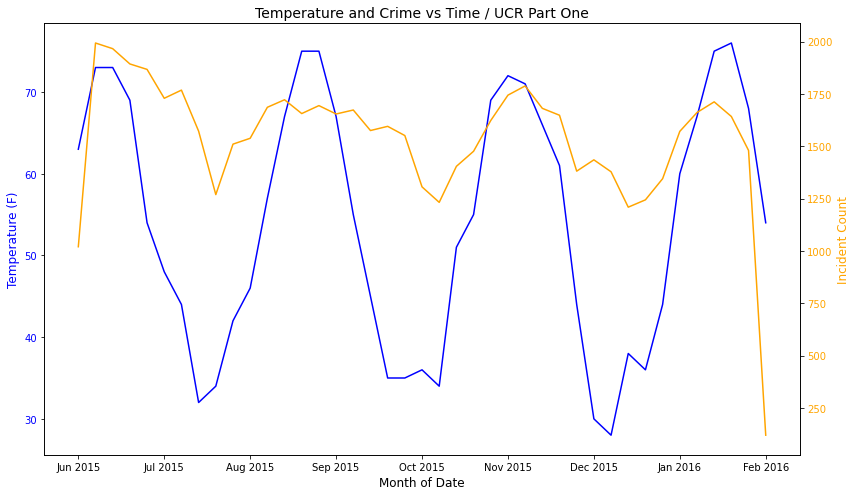

In [38]:
# UCR Part One Graph
draw_UCR(crime_month, 'One')

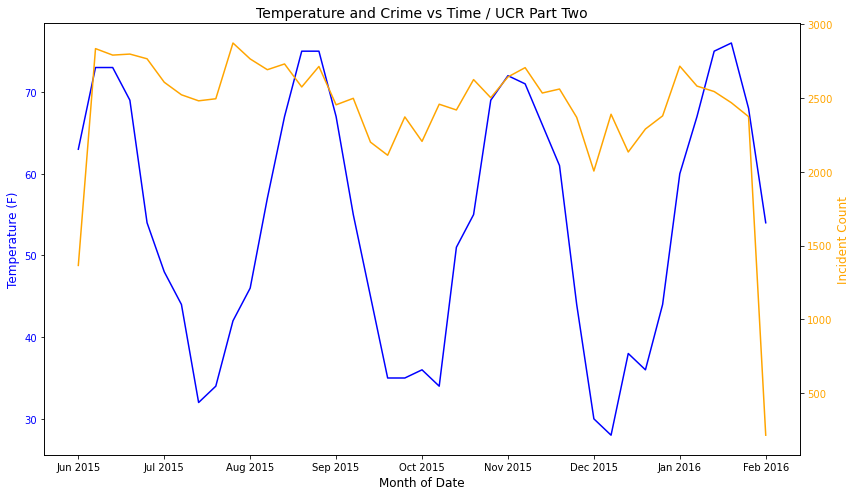

In [39]:
# UCR Part Two Graph
draw_UCR(crime_month, 'Two')

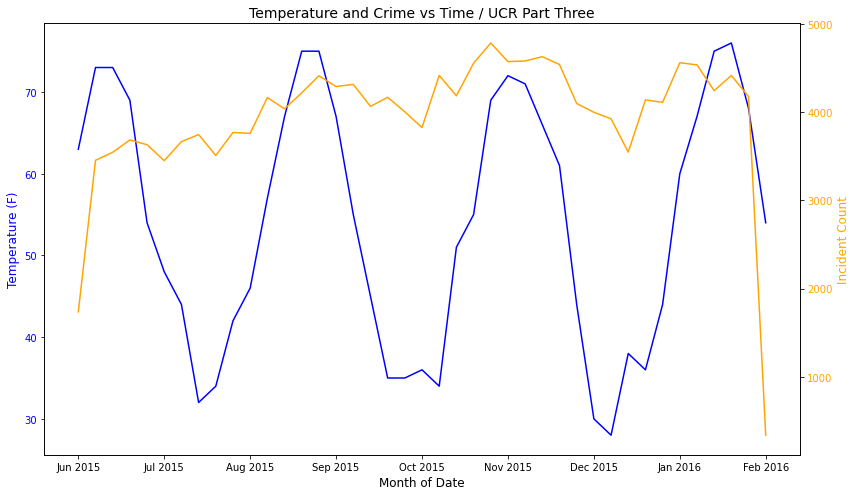

In [40]:
# UCR Part Three Graph
draw_UCR(crime_month, 'Three')

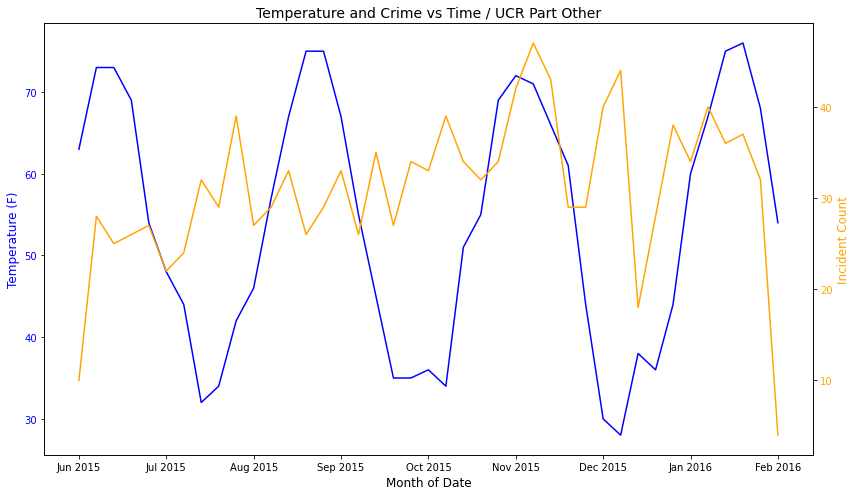

In [41]:
# UCR Part Other Graph
draw_UCR(crime_month, 'Other')

Categorizion helps to eliminate the fact that, one type of crime, being the majority, might affect the other types. Having four graphs visualized like this, we have a pretty clear view on how temperature influenced crime incidents in all four categories of UCR. As the matter of fact, the strongest correlation can only be seen in the first graph where two lines followed quite the same movements. When temperature raised, the incidents count also raised, and the same trend occured when the temperature dropped.

We also notice the same pattern in the second graph, however, it is not as clear as that in the first one. There were more fluctuations. The third and fourth graphs show almost no correlations between the two attributes. On a side note, we did not take into account the quick rise in June 2015 and the steep fall in October 2018.

The interesting thing is that in the first three line graphs, the Incident Count pattern, to some extend, resemble that in the "Monthly Incident Count from June 2015 to October 2018" in our previous exploration. The last graph owns the strongest fluction through out the time period. Perhaps, this is due to the difference among the types of crime in the four parts of UCR.

### Optimization

This section won't go deep into new explorations but rather find a better way to visualize our old graphs, and hopefully, product a better exploration. As we may have noticed, in the last 4 line graphs that involve in our last exploration, the line charts for Incident Count in each of the UCR part were heavily influenced by the incomplete data of June 2015 and October 2018. As we have stated above, this is due to the incompleteness of the original datasets. The influence caused an extreme extension in the range of y-axis. To be more specific, the rapid rise at the beginning of the chart and the steep drop at the end of it have extended the range to below 250, 500, 1000, and 10 cases in UCR Part One, UCR Part Two, UCR Part Three, and UCR Part Other respectively. This overall has made the changes in complete months less significant than they should have been visually. Therefore, one way to fix this is to drop the first and last month of our time span or June 2015 and October 2018 specifically.

In [42]:
# Drop the first and last row
crime_month_drop = crime_month.drop(crime_month.index[0])
crime_month_drop.drop(crime_month_drop.index[-1], inplace=True)

In [43]:
crime_month_drop.head()

,Month Year,month,year,Incident Count,Incident Count Part One,Incident Count Part Two,Incident Count Part Three,Incident Count Part Other,Average Temperature
1,Jul 2015,7,2015,8326,1993,2835,3456,28,73
2,Aug 2015,8,2015,8343,1966,2791,3547,25,73
3,Sep 2015,9,2015,8415,1893,2798,3687,26,69
4,Oct 2015,10,2015,8308,1867,2766,3633,27,54
5,Nov 2015,11,2015,7818,1729,2607,3452,22,48


In [44]:
crime_month_drop.tail()

,Month Year,month,year,Incident Count,Incident Count Part One,Incident Count Part Two,Incident Count Part Three,Incident Count Part Other,Average Temperature
35,May 2018,5,2018,8939,1571,2716,4563,34,60
36,Jun 2018,6,2018,8883,1661,2581,4539,40,67
37,Jul 2018,7,2018,8617,1712,2544,4246,36,75
38,Aug 2018,8,2018,8645,1642,2468,4419,37,76
39,Sep 2018,9,2018,8132,1480,2374,4179,32,68


Let's plot them out using our draw_UCR() function.

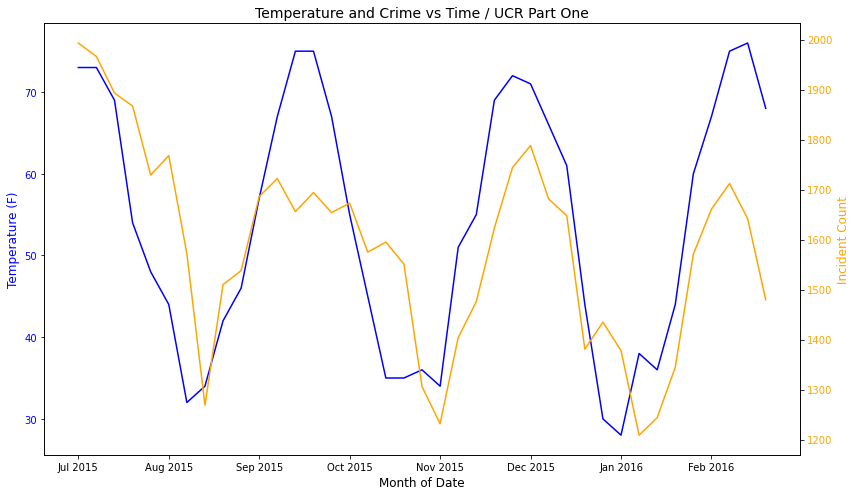

In [45]:
# Plotting
draw_UCR(crime_month_drop, "One")

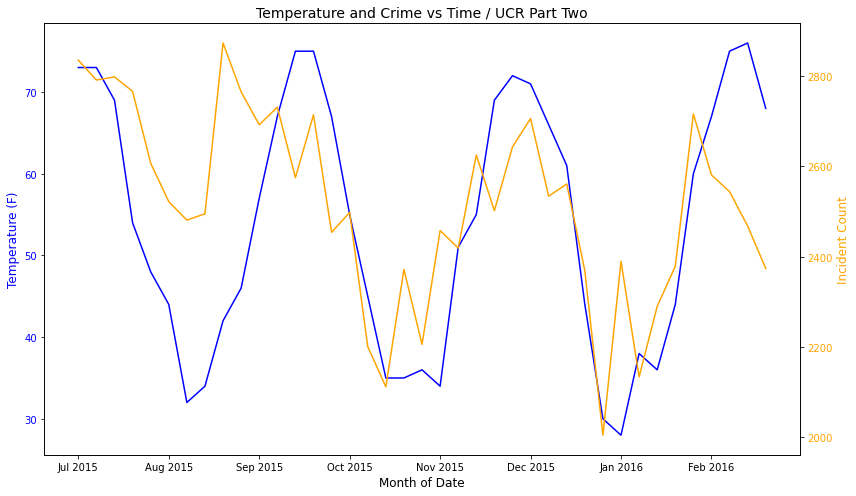

In [46]:
draw_UCR(crime_month_drop, "Two")

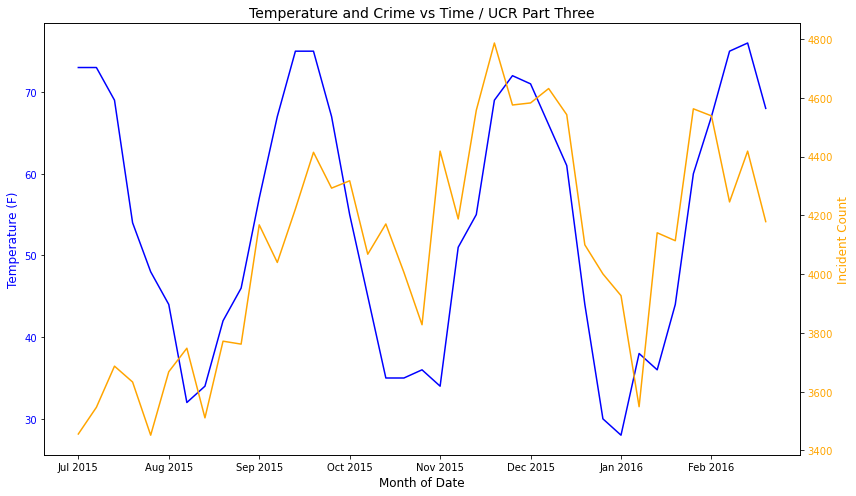

In [47]:
draw_UCR(crime_month_drop, "Three")

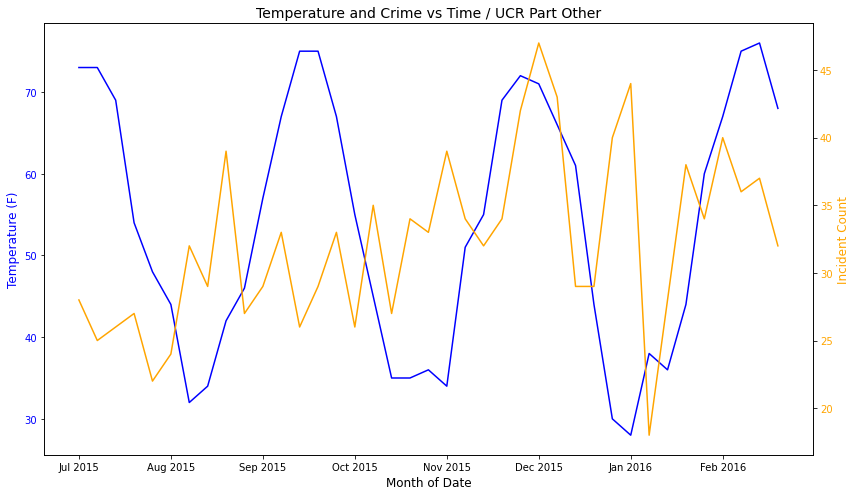

In [48]:
draw_UCR(crime_month_drop, "Other")

The first thing that we can point out immediately looking at these for new graphs is that the movements of the two line charts in each graph have significantly followed the same pattern. As the matter of fact, the first three graphs still show a stronger correlation than the last one, but we can notice a lot of increase-together and decrease-together periods in Temperature and Incident Count in the fourth graph, much cleaer than that in our old exploration.

All in all, this simple optimazation technique has proved to be surprisingly helpful in displaying dramatically clearer correlations, thus emphasizing the relationship between the two attributes. Now, it is safe to say that we can conclude a strong positive correlation between Temperature and Incident Count.

<br>


### 9. Conclusion
---
*(Briefly describe what you have done and what you discovered. Discuss any shortcomings of the process and results. Propose future work. **Finally, discuss the lessons learned from doing the project**.)*

Throughout several visualization and analysis, we firmly believe that we have found the strong positive correlation between the numbe of crime occurrence and the average temperature of the month. The graphs have indicated that in most cases, the incident count increased when the average temperature rose, and the count decreased when the temperature dropped.Income level did not play an influential role in affecting in the pattern of incident count like what we had expected at the beginning of our project. Even though it is logic to say parts of the data have proven that wealthier districts had fewer incidents, but there were not enough to make a concrete conclusion that income level and crime have anything to do with each other, at least in the scope of our project.


### 10. References

AnkurJain. (2018, October 04). Crimes in Boston. Retrieved May 26, 2019, from https://www.kaggle.com/ankkur13/boston-crime-dataNational Institute of Justice. (n.d.).

Police Districts. Retrieved from https://bpdnews.com/districts. Boston Police Department. (n.d).

Household Income in Boston, MA by Zip Code. Retrieved from http://www.zipatlas.com/us/ma/boston/zip-code-comparison/median-household-income.htm. ZipAtlas.com Development Team. (n.d.).


---
(*Use the following requirements for writing your reports. DO NOT DELETE THE CELLS BELLOW*)

# Project Requirements

This final project examines the level of knowledge the students have learned from the course. The following course outcomes will be checked against the content of the report:

Upon successful completion of this course, a student will be able to:
* Describe the main steps and key issues in the process of acquiring and preparing data for data analytics.
* Set up data analysis environment by integrating commonly used practical tools and programming packages.   
* Explain different types of data storages and formats and apply appropriate tools for extracting and transforming data.
* Create interactive and programming code for cleansing, wrangling, reshaping, visualizing and analyzing various data sets. 
* Explain the concepts of aggregation and grouping, and apply tools and write programs to aggregate and group data.

** Marking will be foucsed on both presentation and content.** 

## Written Presentation Requirements
The report will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as its contents. Please make sure that the text of your report is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

## Technical Content:
* Is the problem well defined and described thoroughly?
* Is the size and complexity of the data set used in this project comparable to that of the example data sets used in the lectures and assignments?
* Did the report describe the charactriatics of the data?
* Did the report describe the goals of the data analysis?
* Did the analysis use plotting methods for visualization? Does the visualization convey meaningful messages?
* Did the analysis use wrangling, cleaning, and preparation methods? Does the work on wrangling, cleaning, and preparation demonstrate the student's knowlegde about these topics covered in this course?
* Did the analysis conduct aggretation and create descriptive statistics? Does the work on aggregation and descriptive statistics demonstrate the student's knowlegde about these topics covered in this course?
* Did the report include all related references?
* Only those projects that exceed the sophistication of the final data analysis examples and assignments can be marked as the highest level of grade.
* Overall, what is the rating of this project?